In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Delivery_time.csv")

In [3]:
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df1 = df1.rename(columns={'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'})

In [5]:
df1.shape

(21, 2)

<AxesSubplot:>

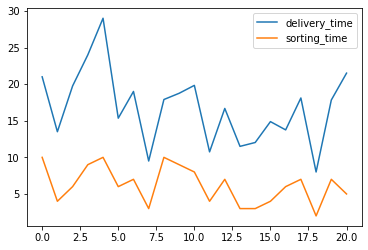

In [6]:
df1.plot()

<AxesSubplot:>

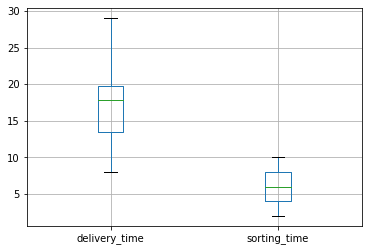

In [7]:
df1.boxplot()

C:\Users\saurav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

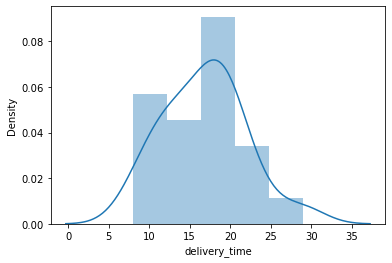

In [8]:
sns.distplot(df1.delivery_time)

C:\Users\saurav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

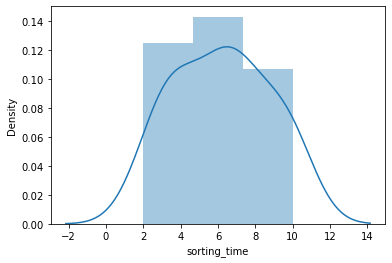

In [9]:
sns.distplot(df1.sorting_time)

In [10]:
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [11]:
df1.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

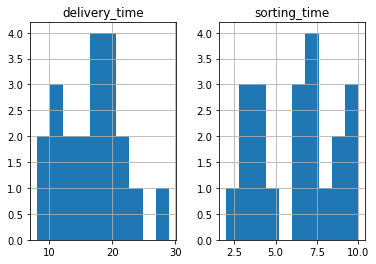

In [12]:
df1.hist()
plt.show

In [13]:
import statsmodels.formula.api as smf

In [14]:
##fitting linear model
model = smf.ols('sorting_time~delivery_time', data=df1).fit()

<function matplotlib.pyplot.show(close=None, block=None)>

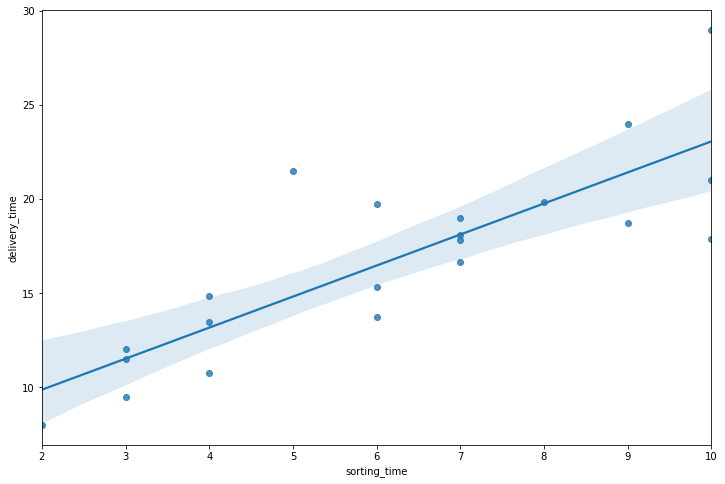

In [15]:
plt.figure(figsize=(12,8))
sns.regplot(x='sorting_time', y='delivery_time', data=df1)
plt.show

In [16]:
## cofficient
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [17]:
print(f' t value is: {model.tvalues} \n pvalue is: {model.pvalues}')

 t value is: Intercept       -0.667290
delivery_time    6.387447
dtype: float64 
 pvalue is: Intercept        0.512611
delivery_time    0.000004
dtype: float64


In [18]:
model.rsquared

0.6822714748417232

In [19]:
model.rsquared_adj

0.6655489208860245

In [20]:
pred = model.predict(df1.delivery_time)

In [21]:
pred_actual1 = pd.DataFrame(pred, columns= ["predict"])
pred_actual1['actual'] = df1.sorting_time

In [22]:
pred_actual1[:10]

,predict,actual
0,7.931943,10
1,4.828866,4
2,7.414763,6
3,9.173174,9
4,11.241892,10
5,5.594291,6
6,7.104456,7
7,3.173891,3
8,6.649338,10
9,7.001020,9


## prediction by Linear Regression model without Transformation

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
df1.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [25]:
df1.shape

(21, 2)

In [26]:
df1.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [27]:
df1.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [28]:
model1 = LinearRegression()

In [30]:
x = pd.DataFrame(df1.delivery_time)
y = pd.DataFrame(df1.sorting_time)

In [31]:
model1.fit(x,y)

LinearRegression()

In [32]:
pred = model1.predict(x)

In [33]:
pred_actual1 = pd.DataFrame(pred)
pred_actual1['Actual'] = y

In [34]:
pred_actual1

,0,Actual
0,7.931943,10
1,4.828866,4
2,7.414763,6
3,9.173174,9
4,11.241892,10
5,5.594291,6
6,7.104456,7
7,3.173891,3
8,6.649338,10
9,7.001020,9


In [36]:
print(model1.intercept_)

print(model1.coef_)

[-0.75667337]
[[0.41374363]]


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

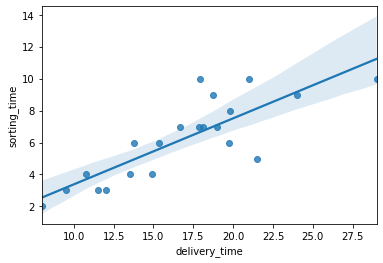

In [38]:
sns.regplot(x='delivery_time', y= 'sorting_time', data=df1)

In [39]:
from sklearn import metrics

In [40]:
print("Mean absolute error: ", metrics.mean_absolute_error(y, pred))
print("Mean squared error: ", metrics.mean_squared_error(y, pred))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y, pred)))
print("R^2: ", metrics.r2_score(y, pred))


Mean absolute error:  1.0715241974514929
Mean squared error:  1.9553633044888064
Root mean square error:  1.0351445297404092
R^2:  0.682271474841723


## Logirthm Transformation

In [52]:
x_log = np.log(df1.delivery_time.values.reshape(-1,1))
y_log = df1.sorting_time.values.reshape(-1,1)

In [53]:
model2 = LinearRegression()

In [54]:
model2.fit(x_log,y_log)

LinearRegression()

In [55]:
print('intercept value of model is: ', model2.intercept_ )
print('co-efficient of model is: ', model2.coef_)

intercept value of model is:  [-12.49923268]
co-efficient of model is:  [[6.73554841]]


In [56]:
## prediction of the model
y_log_pred = model2.predict(x_log)

In [57]:
y_log_pred[:10]

array([[ 8.0072956 ],
       [ 5.0313097 ],
       [ 7.59394209],
       [ 8.90670276],
       [10.18135141],
       [ 5.89632782],
       [ 7.33317862],
       [ 2.66445223],
       [ 6.93148219],
       [ 7.24396475]])

In [58]:
pred_df = pd.DataFrame(y_log_pred, columns=['pridict'])
pred_df['actual'] = y_log

In [59]:
pred_df[:10]

,pridict,actual
0,8.007296,10
1,5.031310,4
2,7.593942,6
3,8.906703,9
4,10.181351,10
5,5.896328,6
6,7.333179,7
7,2.664452,3
8,6.931482,10
9,7.243965,9


In [61]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_log, y_log_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_log, y_log_pred))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y_log, y_log_pred)))
print("R^2: ", metrics.r2_score(y_log, y_log_pred))


Mean absolute error:  0.9722465334047906
Mean squared error:  1.778883003785605
Root mean square error:  0.9860256251258335
R^2:  0.7109478980584185


## Exponential Transformation

In [66]:
x_e_log = df1.delivery_time.values.reshape(-1,1)
y_e_log = np.log(df1.sorting_time.values.reshape(-1,1))

In [67]:
exe_model = LinearRegression()

In [68]:
exe_model.fit(x_e_log, y_e_log)

LinearRegression()

In [71]:
print('Exponentional model Intercept value is: ', exe_model.intercept_)
print('co-efficient model Intercept value is: ', exe_model.coef_)

Exponentional model Intercept value is:  [0.43723654]
co-efficient model Intercept value is:  [[0.07690055]]


In [72]:
exe_model_pred = exe_model.predict(x_e_log)

In [74]:
actual_pred = pd.DataFrame(exe_model_pred, columns=['pridict'])

In [75]:
actual_pred['actual'] = y_e_log

In [76]:
actual_pred[:5]

,pridict,actual
0,2.052148,2.302585
1,1.475394,1.386294
2,1.956022,1.791759
3,2.282850,2.197225
4,2.667352,2.302585


In [77]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_e_log, exe_model_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_e_log, exe_model_pred))
print("Root mean square error: ", np.sqrt(metrics.mean_absolute_error(y_e_log, exe_model_pred)))
print("R^2: ", metrics.r2_score(y_e_log, exe_model_pred))


Mean absolute error:  0.21860280713400707
Mean squared error:  0.06352297271549998
Root mean square error:  0.46754979107471223
R^2:  0.6954434611324223
